In [1]:
# https://pyvia.readthedocs.io/en/latest/notebooks/ViaJupyter_Toy_Multifurcating.html

from pyVIA.core import *
from tqdm import tqdm
import scanpy as sc

import pandas as pd
import numpy as np
import umap 
#import pyVIA.core as via
from collections import Counter, defaultdict


import os
import sys
sys.path.append(os.path.abspath('../'))
from lib.embed_arithmetic import get_description

c:\Users\User\miniconda3\envs\rna\lib\site-packages\phate\__init__.py


In [2]:
# Read data
path = "../data/raw/data_rna_central/general_dataframes/"

# ADD sequences of interest
files_unique = "general_rnafm_unique.csv"
dg_unique = pd.read_pickle(path+files_unique)

# ADD random sequences
files_random = [
    "general_rnafm_random_8nucl_full.csv", # rna_data_extract_random.py
    "general_rnafm_random_10nucl_full_noN.csv", # rna_data_extract_random.py
    "general_rnafm_hairpin_9nucl_full.csv", # rna_data_extract_hairpin.py
    "general_rnafm_hairpin_tail_8nucl_full.csv", # rna_data_extract_hairpin_tail.py
    "general_rnafm_symmetric_8nucl_full.csv", # rna_data_extract_symmetric.py
    ]
dg = pd.read_pickle(path+files_random[1])
# dg_base = dg_base[(dg_base['sequence'].str.len() > 0)&(dg_base['sequence'].str.len() <= 8)]
dg = dg.reset_index(drop=True)
dg = dg.drop(dg.index) # make dataframe empty

# ADD sequences from RNAcentral database
# Set the basis
extract_types = ["tRNA"] #["tRNA", 'hammerhead_ribozyme'] #[''] ['tRNA', 'hammerhead_ribozyme']
Nfiles = 53 # files to download
max_value = Nfiles * 2000 # max number of RNA molecules to load (divisiable by 2000)
step = 2000 # number of RNA molecules in each file
files_db = [f"general_rnafm_{i}_{i+step}.csv" for i in range(0, max_value, step)] # files to download

N_RNA_missing = 0 # keep track of number RNAs not downloaded from RNAcentral 
if len(extract_types)>0:
    for file in tqdm(files_db):
        df = pd.read_pickle(path+file)# [N_start: N_end]
        perecent_missing = 100*(100000-len(df))/100000
        N_RNA_missing += 100000 * perecent_missing / 100
        df = df.loc[df["embedding"].apply(lambda x: isinstance(x, np.ndarray))]
        df = df.loc[df.rna_type.isin(extract_types)] # keep rna_type of interest
        df = df.reset_index(drop=True)

        dg = pd.concat([dg, df, ], ignore_index=True)

# Concatenate dataframes of interest
#dg = pd.concat([dg_unique.loc[8:8], dg_unique.loc[8:8], dg_unique.loc[8:8], dg], ignore_index=True)
dg = pd.concat([dg_unique,  dg], ignore_index=True).reset_index(drop=True)
#dg_base = dg_base.loc[dg_base.rna_type!="SymR_PA"]
dg = dg.reset_index(drop=True)
    
print("N_RNA_missing ", int(N_RNA_missing))
print("length of dg:", len(dg), "RNA molecules")
print("rna types:", pd.Series(dg.rna_type).unique())



100%|██████████| 53/53 [01:49<00:00,  2.07s/it]


N_RNA_missing  11000
length of dg: 968355 RNA molecules
rna types: ['empty' 'PTC' 'SymR_A' 'SymR_P' 'SymR_PA' 'PTC2' 'PTC3' 'PTC4' 'PTC5'
 'tRNA']


In [3]:
# Decrease dataframe size
# Keep only random L rows for each rna type
L = 100000  # Number of rows to keep per unique 'sequence'

# Select up to L rows per group
dg = dg.groupby("rna_type").apply(lambda x: x.sample(n=min(L, len(x)), random_state=42)).reset_index(drop=True)

print(len(dg))
print("rna types:", pd.Series(dg.rna_type).unique())


C:\Users\User\AppData\Local\Temp\ipykernel_55208\2825091936.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dg = dg.groupby("rna_type").apply(lambda x: x.sample(n=min(L, len(x)), random_state=42)).reset_index(drop=True)


100009
rna types: ['PTC' 'PTC2' 'PTC3' 'PTC4' 'PTC5' 'SymR_A' 'SymR_P' 'SymR_PA' 'empty'
 'tRNA']


In [ ]:
# RUN one of three following cells to prepare data for analysis
# PCA or UMAP or no reduction

In [ ]:
# PCA dimention reduction

true_labels2 = dg["rna_type"].tolist()
embeddings = np.array(dg['embedding'].tolist())  # Convert list of embeddings into numpy array
print("emb", embeddings.shape)

from sklearn.decomposition import PCA  # Import PCA
pca_model = PCA(n_components=10)  # n_components is the number of principal components
reduced_embeddings_pca = pca_model.fit_transform(embeddings)  # Fit and transform the data
print(f"PCA Reduced Embeddings shape: {reduced_embeddings_pca.shape}")

ncomps = 50
data = reduced_embeddings_pca[:, 0:ncomps]
print("data", data.shape)
nsamples, ncomp = data.shape

print(dg.rna_type.unique().tolist())

In [ ]:
# or!
# UMAP dimention reduction

embeddings = np.array(dg['embedding'].tolist())  # Convert list of embeddings into numpy array
true_labels2 = dg["rna_type"].tolist()
print("emb", embeddings.shape)
ncomps = 640 / 2
umap_model = umap.UMAP(n_components=ncomps, random_state=42, n_jobs=-1)
reduced_embeddings_pca = umap_model.fit_transform(embeddings)
reduced_embeddings_pca.shape
# data = reduced_embeddings_pca[:, 0:ncomps]

In [4]:
# No dimention reduction

ncomps = 640
true_labels2 = dg["rna_type"].tolist()
embeddings = np.array(dg['embedding'].tolist())
reduced_embeddings_pca = embeddings
reduced_embeddings_pca.shape
#reduced_embeddings_pca[:, 0:int(ncomps)].shape

(100009, 640)

2025-04-02 12:41:14.826840	Running VIA over input data of 100009 (samples) x 640 (features)
2025-04-02 12:41:14.826840	Knngraph has 200 neighbors
check
2025-04-02 12:49:32.183096	Finished global pruning of 200-knn graph used for clustering at level of 0.15. Kept 47.2 % of edges. 
2025-04-02 12:49:37.901469	Number of connected components used for clustergraph  is 1
2025-04-02 12:51:44.067669	Commencing community detection
2025-04-02 12:52:10.851254	Finished community detection. Found 1921 clusters.
2025-04-02 12:52:10.895633	Merging 1805 very small clusters (<10)
2025-04-02 12:52:11.193969	Finished detecting communities. Found 116 communities
labels [ 5  5  5 ... 62 15 18]
2025-04-02 12:52:11.193969	Making cluster graph. Global cluster graph pruning level: 1.0
2025-04-02 12:52:17.317893	Graph has 1 connected components before pruning
2025-04-02 12:52:17.333525	Graph has 1 connected components after pruning
2025-04-02 12:52:17.333525	Graph has 1 connected components after reconnecting
20

c:\Users\User\miniconda3\envs\rna\lib\site-packages\pyVIA\core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1300 [00:00<?, ?it/s]

memory for rw2 hittings times  2. Using rw2 based pt
2025-04-02 12:53:44.366892	Identifying terminal clusters corresponding to unique lineages...
2025-04-02 12:53:44.366892	Closeness:[1, 3, 4, 5, 7, 8, 11, 13, 15, 16, 21, 22, 23, 24, 26, 27, 32, 33, 34, 37, 38, 41, 46, 50, 51, 53, 65, 66, 68, 69, 73, 75, 78, 81, 82, 86, 88, 90, 97, 98, 102, 106, 107, 110, 111, 114]
2025-04-02 12:53:44.366892	Betweenness:[1, 3, 4, 7, 8, 10, 11, 12, 14, 16, 18, 19, 21, 22, 23, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 47, 48, 50, 51, 52, 54, 55, 56, 58, 59, 60, 63, 64, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 81, 82, 84, 85, 86, 87, 89, 91, 97, 99, 101, 102, 106, 108, 109, 110, 111]
2025-04-02 12:53:44.366892	Out Degree:[1, 3, 4, 5, 7, 8, 10, 11, 14, 15, 16, 19, 21, 22, 23, 26, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 48, 50, 51, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 82, 84, 86, 87, 88, 90, 94, 96, 97, 98, 99, 1

c:\Users\User\miniconda3\envs\rna\lib\site-packages\pyVIA\core.py:176: UserWarning: WARNING: Implicitly set node IDs to the canonical node ordering due to missing IDs field in the raw CSR npz file. This warning message can be suppressed by setting implicit_ids to True in the read_npz function call, or by setting the --implicit_ids flag in the CLI
  g.set_node_ids(node_ids=None,


  0%|          | 0/1000 [00:00<?, ?it/s]

2025-04-02 12:53:48.752386	Cluster or terminal cell fate 1 is reached 647.0 times
2025-04-02 12:53:48.832893	Cluster or terminal cell fate 3 is reached 631.0 times
2025-04-02 12:53:48.918853	Cluster or terminal cell fate 4 is reached 641.0 times
2025-04-02 12:53:49.002933	Cluster or terminal cell fate 7 is reached 649.0 times
2025-04-02 12:53:49.099433	Cluster or terminal cell fate 11 is reached 337.0 times
2025-04-02 12:53:49.184610	Cluster or terminal cell fate 16 is reached 643.0 times
2025-04-02 12:53:49.281940	Cluster or terminal cell fate 21 is reached 561.0 times
2025-04-02 12:53:49.393703	Cluster or terminal cell fate 22 is reached 527.0 times
2025-04-02 12:53:49.475905	Cluster or terminal cell fate 26 is reached 646.0 times
2025-04-02 12:53:49.562478	Cluster or terminal cell fate 32 is reached 656.0 times
2025-04-02 12:53:49.672268	Cluster or terminal cell fate 33 is reached 328.0 times
2025-04-02 12:53:49.753985	Cluster or terminal cell fate 38 is reached 658.0 times
2025-04-

c:\Users\User\miniconda3\envs\rna\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2025-04-02 12:54:48.728760	Time elapsed 673.8 seconds


c:\Users\User\miniconda3\envs\rna\lib\site-packages\pyVIA\plotting_via.py:3704: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group_frac[ii][group_i] = true_label_in_group_i.count(ii)
c:\Users\User\miniconda3\envs\rna\lib\site-packages\pyVIA

tune edges False
hammer_bundle for edges hbnp[:,2] unique from plotting_via.py func plot_viagraph_
: [6.486e-04 6.495e-04 6.500e-04 ... 2.052e+00 2.057e+00       nan]
hammer_bundle for edges hbnp[:,2] unique from plotting_via.py func plot_viagraph_
: [6.486e-04 6.495e-04 6.500e-04 ... 2.052e+00 2.057e+00       nan]


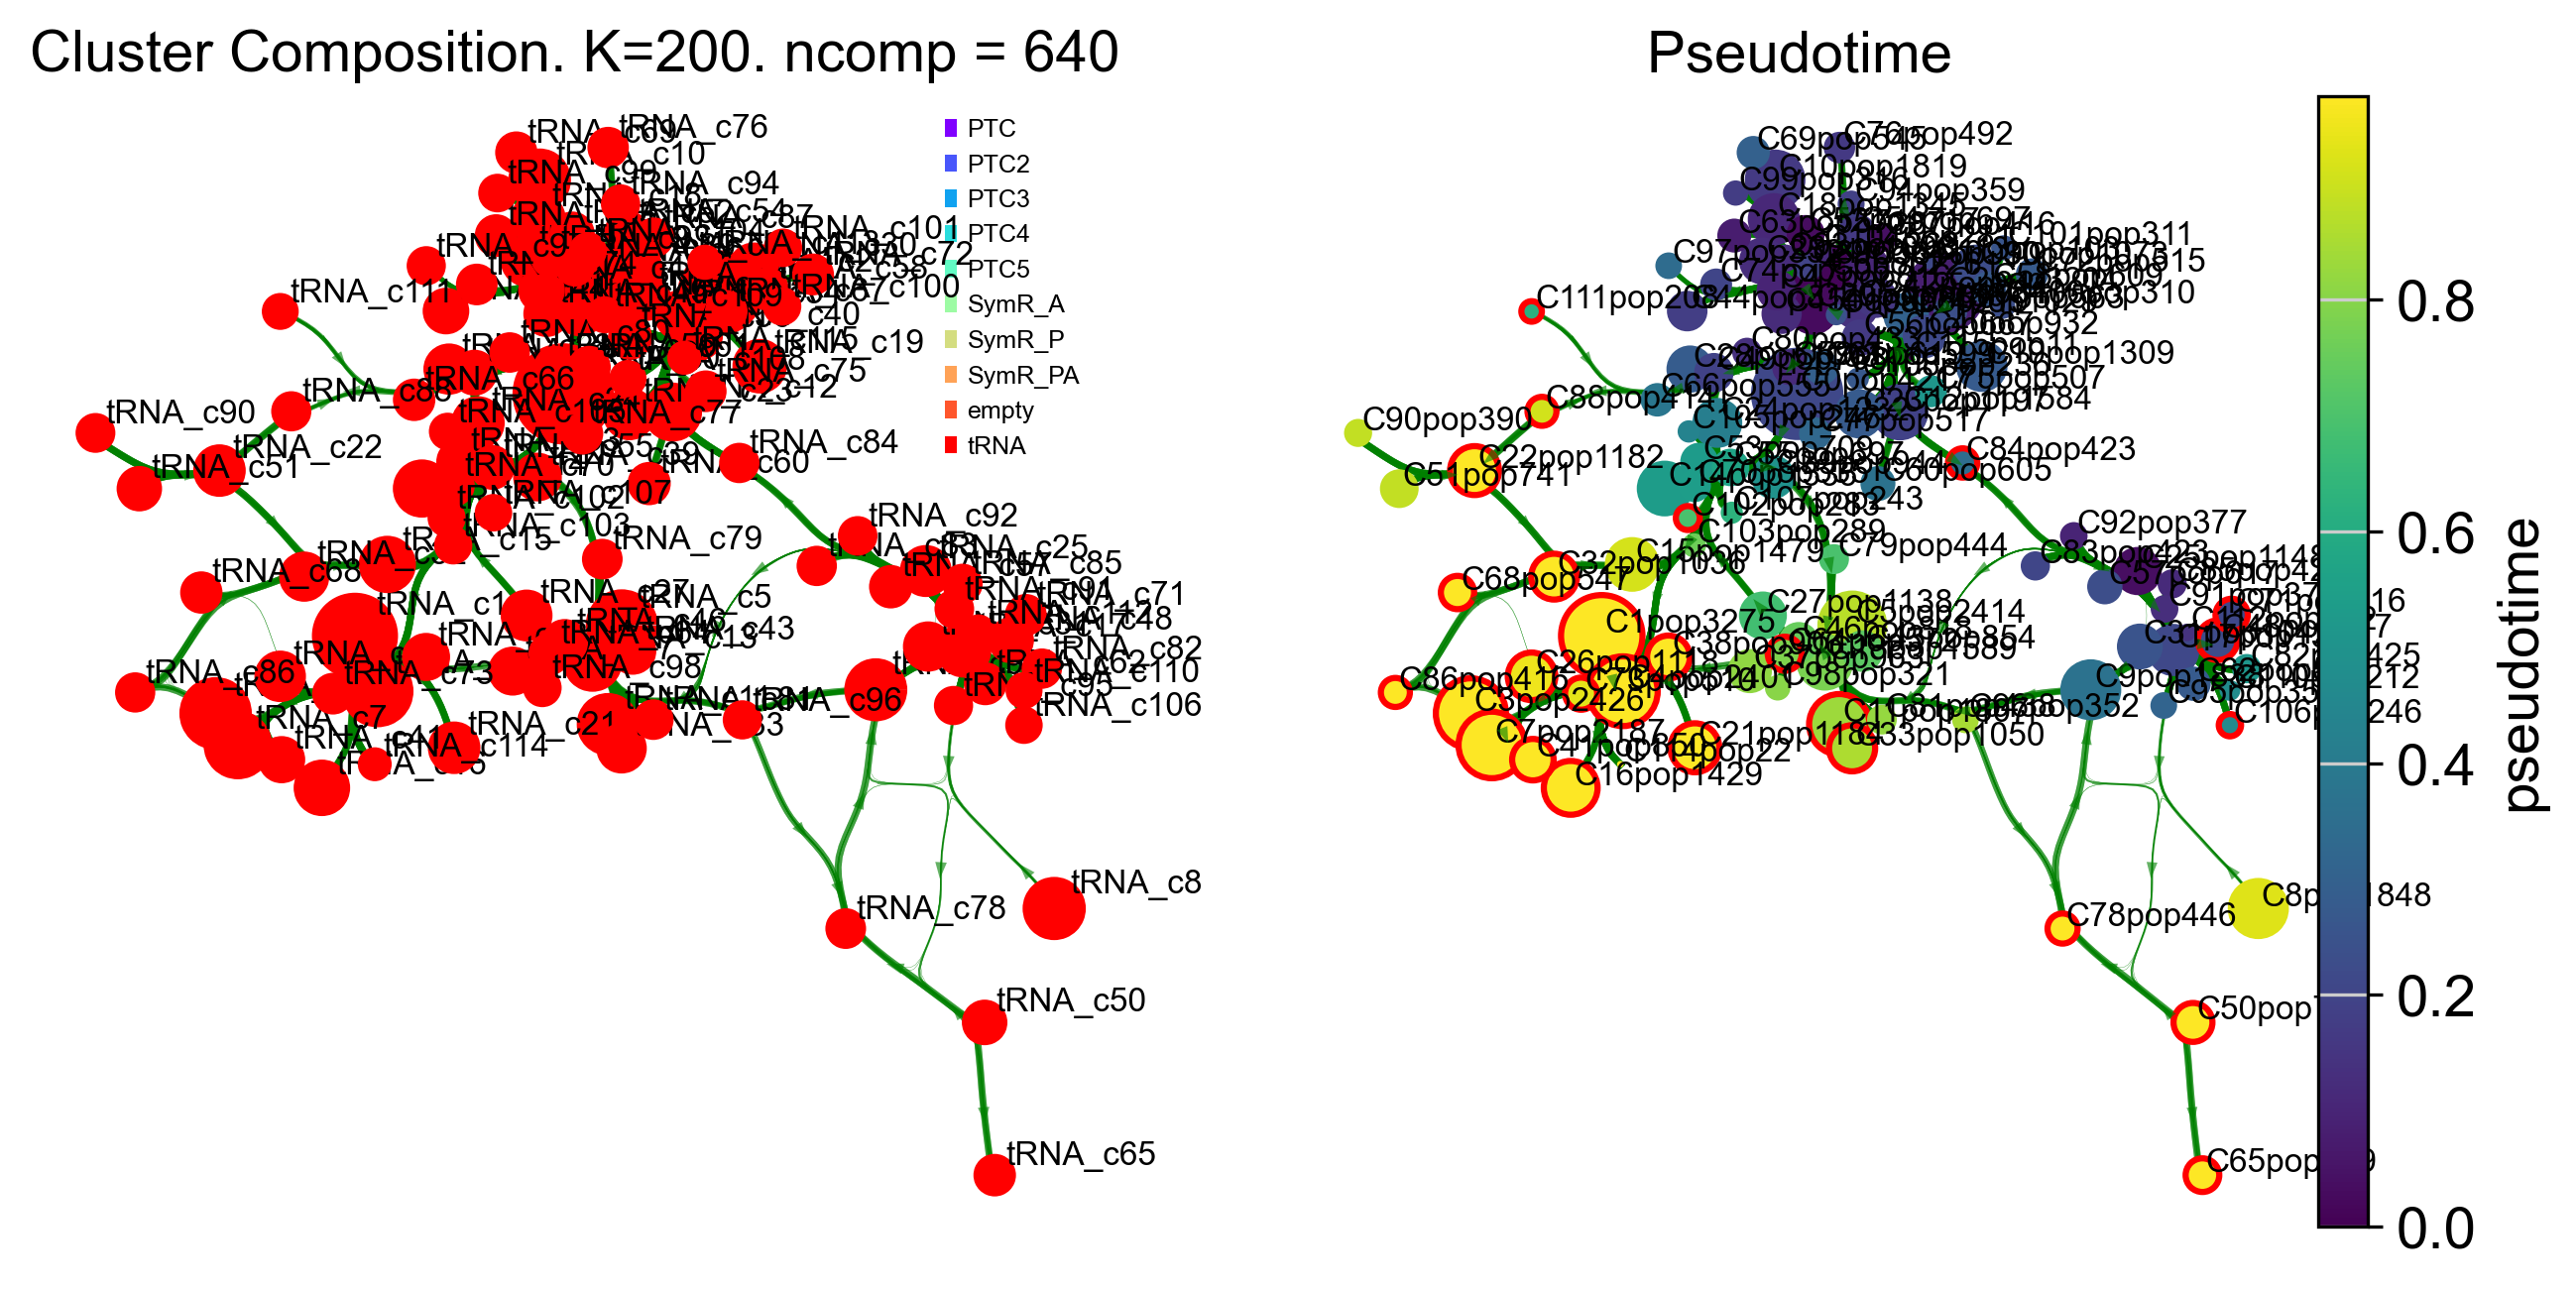

In [5]:
# Run analysis

#ncomps, knn, random_seed, dataset, root_user, memory = 3, 20, 42, 'toy', ['M1'], 20
random_seed, root_user = 42, ['None']
knn = 200
memory = 5 #40
small_pop = 10
num_threads = -1

v0 = VIA(
    reduced_embeddings_pca[:, 0:int(ncomps)],
    # reduced_embeddings[:, 0:ncomps],
    #adata_counts.obsm['X_pca'][:, 0:ncomps],
    true_labels2,
    #edgepruning_clustering_resolution=0.15,
    #edgepruning_clustering_resolution_local=1,
    knn=knn,
    cluster_graph_pruning=1.0,# remove faible connections
    too_big_factor=0.3, # Forces clusters > 0.4*n_cells to be re-clustered
    root_user=root_user,
    #preserve_disconnected=True,
    #dataset='group',
    random_seed=random_seed, memory=memory, small_pop=small_pop,
    num_threads=num_threads)
v0.run_VIA()

########################
# make plot

f,ax1, axs2 = plot_piechart_viagraph(v0,
                                         cmap='viridis', 
                                         ax_text=True, 
                                         gene_exp='', 
                                         alpha_edge=0.5, 
                                         linewidth_edge=1.5, 
                                         edge_color='green', 
                                         headwidth_arrow=0.2) #, pie_size_scale=0.4)
f.set_size_inches(10,5)

PTC in cluster 5
CCA percentage in whole dataframe: 0.3570578647921687


c:\Users\User\miniconda3\envs\rna\lib\site-packages\pyVIA\plotting_via.py:3704: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group_frac[ii][group_i] = true_label_in_group_i.count(ii)
c:\Users\User\miniconda3\envs\rna\lib\site-packages\pyVIA

tune edges False
hammer_bundle for edges hbnp[:,2] unique from plotting_via.py func plot_viagraph_
: [6.486e-04 6.495e-04 6.500e-04 ... 2.052e+00 2.057e+00       nan]
hammer_bundle for edges hbnp[:,2] unique from plotting_via.py func plot_viagraph_
: [6.486e-04 6.495e-04 6.500e-04 ... 2.052e+00 2.057e+00       nan]


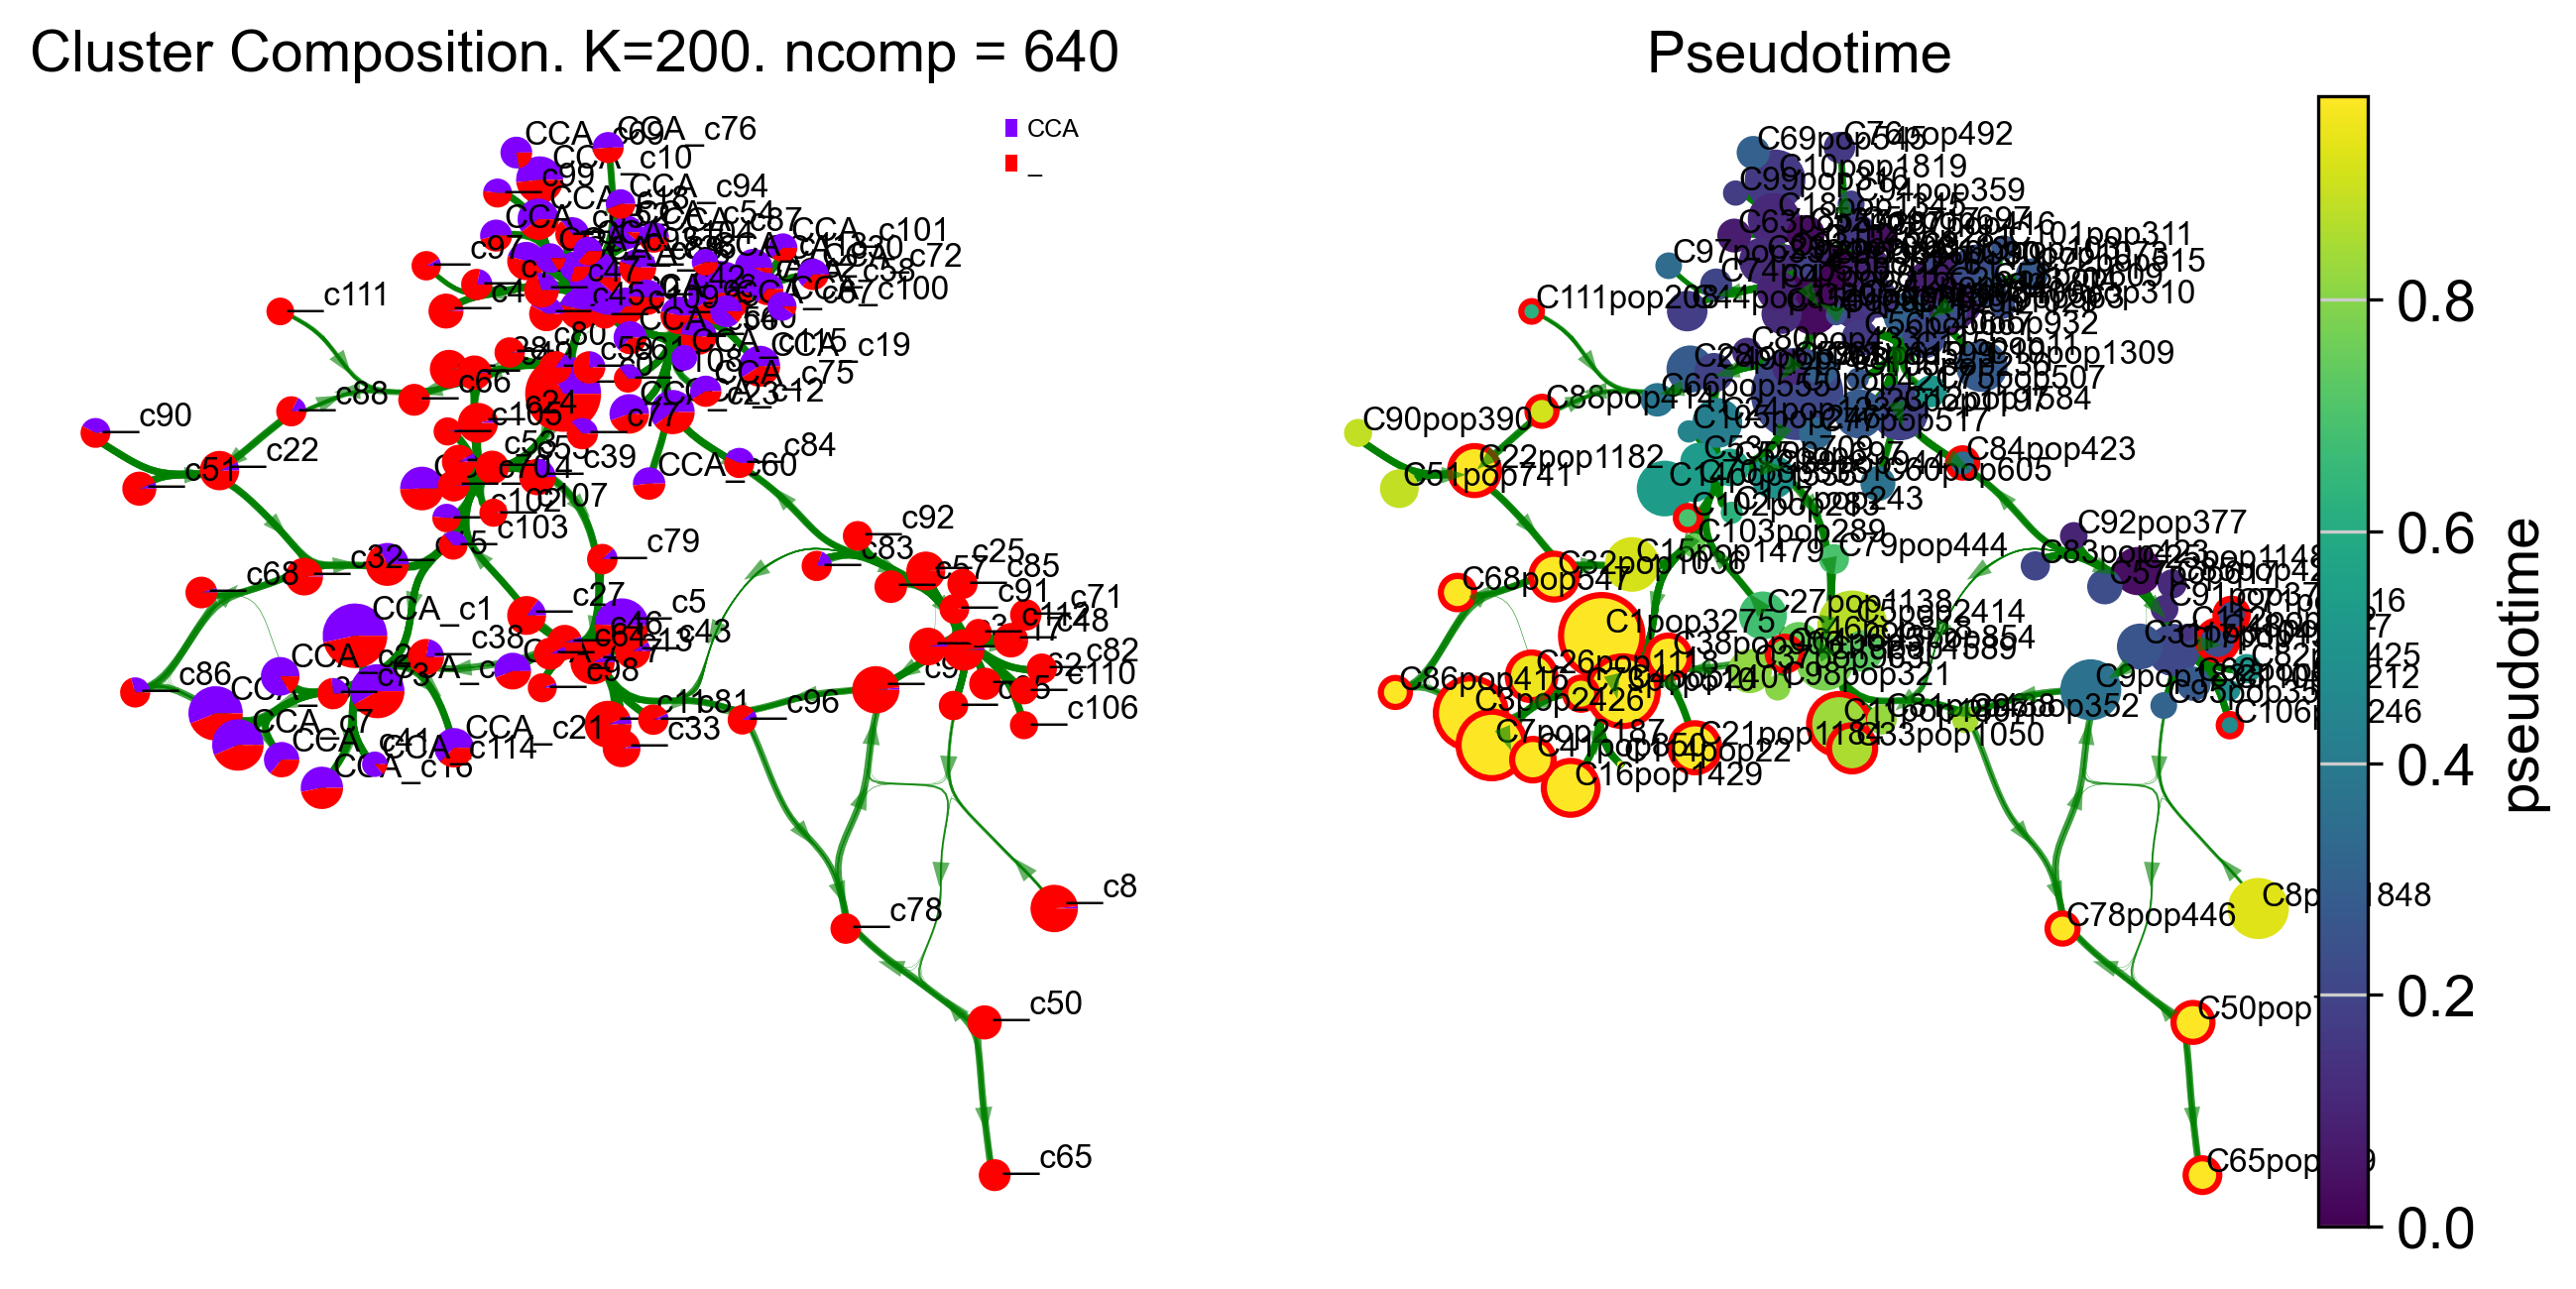

In [6]:
# make same plot, but taking into account the presence of CCA at the end of RNA
# find the number of cluster with PTC (change to PTC2, PTC3, ...) 
# to define cluster_PTC

# search for CCA subsequence
reference_labels = []
#L = len(sorted_grouped_data["tRNA"])
L = len(dg)
k = 0
for i in range(len(dg)):
    if dg.rna_type.iloc[i]=="PTC2":
        print("PTC in cluster", v0.labels[i])
        cluster_PTC = v0.labels[i]
    if dg.sequence.iloc[i][-3:]=="CCA": #[-3:]
        k = k + 1
        reference_labels.append("CCA")
    else:
        reference_labels.append("_")
print("CCA percentage in whole dataframe:", k/L)


f,ax1, axs2 = plot_piechart_viagraph(v0,
                                         #gene_exp=np.arange(0,53),
                                         cmap='viridis', 
                                         ax_text=True, 
                                         #gene_exp='', 
                                         alpha_edge=0.5, 
                                         linewidth_edge=1.5, 
                                         edge_color='green', 
                                         headwidth_arrow=0.3,
                                         reference_labels=reference_labels,
                                         pie_size_scale=0.6)
f.set_size_inches(10,5)

In [7]:
# find input and output nodes from the given cluster_PTC

print("Number in dg, time, direction, weight, PTC in dg")

cluster = cluster_PTC
for i in range(len(v0.df_graph)): 
    #weight = v0.df_graph.iloc[cluster_PTC][i]
    weight = v0.df_graph.iloc[cluster][i]
    if weight>1:
        print(i, round(v0.df_graph["markov_pt"].iloc[i],2),
              int(np.sign(v0.df_graph["markov_pt"].iloc[i]-v0.df_graph["markov_pt"].iloc[cluster])), 
              "weight:", round(weight,2), cluster)

Number in dg, time, direction, weight, PTC in dg
0 0.21 -1 weight: 2.37 5
9 0.37 -1 weight: 1.06 5
11 0.83 -1 weight: 2.36 5
13 0.78 -1 weight: 10.52 5
15 0.91 1 weight: 2.22 5
21 1.0 1 weight: 5.91 5
27 0.68 -1 weight: 1.24 5
39 0.49 -1 weight: 1.4 5
43 0.73 -1 weight: 1.11 5
46 0.75 -1 weight: 1.86 5
79 0.7 -1 weight: 1.24 5
81 0.82 -1 weight: 2.64 5
96 0.85 -1 weight: 4.12 5
103 0.76 -1 weight: 1.04 5


In [8]:
# Sort nodes by their sizes (number of RNA)
from collections import Counter

data = v0.labels
# Calculate frequency of each value
frequency = Counter(data)
# Sort in descending order
sorted_frequency = dict(sorted(frequency.items(), key=lambda x: x[1], reverse=True))
print(sorted_frequency)

{0: 4217, 1: 3275, 2: 3204, 3: 2426, 5: 2414, 4: 2401, 6: 2261, 7: 2187, 8: 1848, 9: 1838, 10: 1819, 11: 1807, 13: 1589, 12: 1584, 14: 1535, 15: 1479, 16: 1429, 17: 1349, 18: 1345, 19: 1309, 20: 1286, 24: 1232, 23: 1197, 21: 1184, 22: 1182, 25: 1148, 27: 1138, 26: 1118, 28: 1103, 29: 1098, 30: 1073, 33: 1050, 31: 1042, 32: 1036, 35: 1034, 34: 1029, 36: 990, 37: 963, 39: 944, 40: 932, 38: 906, 43: 854, 41: 850, 42: 844, 46: 818, 47: 816, 44: 814, 45: 803, 48: 777, 49: 768, 50: 748, 51: 741, 52: 717, 53: 709, 55: 697, 54: 697, 56: 667, 59: 619, 57: 617, 58: 609, 60: 605, 61: 599, 62: 582, 64: 572, 63: 571, 67: 563, 65: 559, 66: 555, 68: 547, 69: 545, 70: 535, 77: 517, 71: 516, 72: 515, 73: 510, 75: 507, 74: 505, 76: 492, 78: 446, 79: 444, 81: 438, 80: 433, 82: 425, 84: 423, 83: 423, 85: 421, 87: 416, 86: 416, 88: 414, 89: 410, 90: 390, 91: 379, 92: 377, 93: 368, 94: 359, 95: 353, 96: 352, 97: 352, 98: 321, 99: 316, 101: 311, 100: 310, 103: 289, 102: 283, 104: 281, 105: 246, 106: 246, 107

In [ ]:
# different times check
# v0.markov_hitting_times
# array([0.216, 0.183, 0.2  , 1.   , 0.658, 0.   ])
# [0.2159638718950612, 0.18276985774764112, 0.1999165766212797, 0.6404241891940744, 0.6404241891940744, 0.0]
# v0.df_graph["markov_pt"]
# 0.215964 0.182770 0.199917 1.000000 0.658110 0.000000
# Name: markov_pt, dtype: float64
# pd.set_option('display.max_columns', None)
# print(list(v0.df_graph.columns))

In [9]:
# Analysis of the given cluster composition
# Run for the given cluster
cluster = cluster_PTC

L = 0
k = 0
rna_in_cluster = []
rna_index_in_cluster = []
for i,rna_type in enumerate(dg["rna_type"]):
    if v0.labels[i] == cluster:
        rna_in_cluster.append(rna_type)
        if 1:#rna_type==RNA_of_interest:
            #rna_in_cluster.append(rna_type)
            rna_index_in_cluster.append( (rna_type, i) )
            L += len(dg["sequence"].iloc[i])
            k += 1
L = L / k
print("aver length", L)


# Create a dictionary where each key maps to a list of values
print(set(rna_in_cluster))
grouped_data = defaultdict(list)
for key, value in rna_index_in_cluster:
    grouped_data[key].append(value)
# Sort dictionary by length of lists in descending order
sorted_grouped_data = dict(sorted(grouped_data.items(), key=lambda item: len(item[1]), reverse=True))
print(sorted_grouped_data)
# print(dg["rna_type"].iloc[30])

aver length 98.45567522783762
{'SymR_P', 'tRNA', 'SymR_PA', 'PTC3', 'SymR_A', 'PTC4', 'PTC', 'PTC2', 'PTC5'}
{'tRNA': [133, 159, 162, 447, 467, 472, 505, 525, 592, 636, 640, 680, 687, 708, 772, 795, 864, 873, 909, 940, 947, 1049, 1071, 1163, 1204, 1248, 1260, 1271, 1272, 1310, 1362, 1371, 1431, 1443, 1508, 1544, 1546, 1549, 1658, 1692, 1718, 1755, 1970, 2071, 2084, 2169, 2200, 2262, 2303, 2331, 2340, 2414, 2426, 2481, 2516, 2534, 2563, 2635, 2719, 2761, 2770, 2866, 2978, 3013, 3080, 3101, 3216, 3231, 3269, 3492, 3533, 3545, 3647, 3672, 3803, 3958, 3961, 4002, 4028, 4048, 4180, 4241, 4298, 4319, 4324, 4376, 4388, 4390, 4434, 4470, 4516, 4580, 4657, 4775, 4815, 4871, 4892, 4930, 4953, 4980, 5082, 5098, 5135, 5164, 5204, 5227, 5229, 5247, 5402, 5434, 5444, 5446, 5494, 5553, 5571, 5606, 5607, 5671, 5694, 5845, 5983, 6051, 6062, 6139, 6154, 6235, 6378, 6401, 6410, 6425, 6442, 6487, 6518, 6542, 6550, 6556, 6567, 6657, 6658, 6700, 6711, 6716, 6758, 6779, 6824, 6902, 6983, 6995, 7001, 7014, 70

In [10]:
# Choose the RNA of interest in the chosen cluster.
RNA_of_interest = 'tRNA'

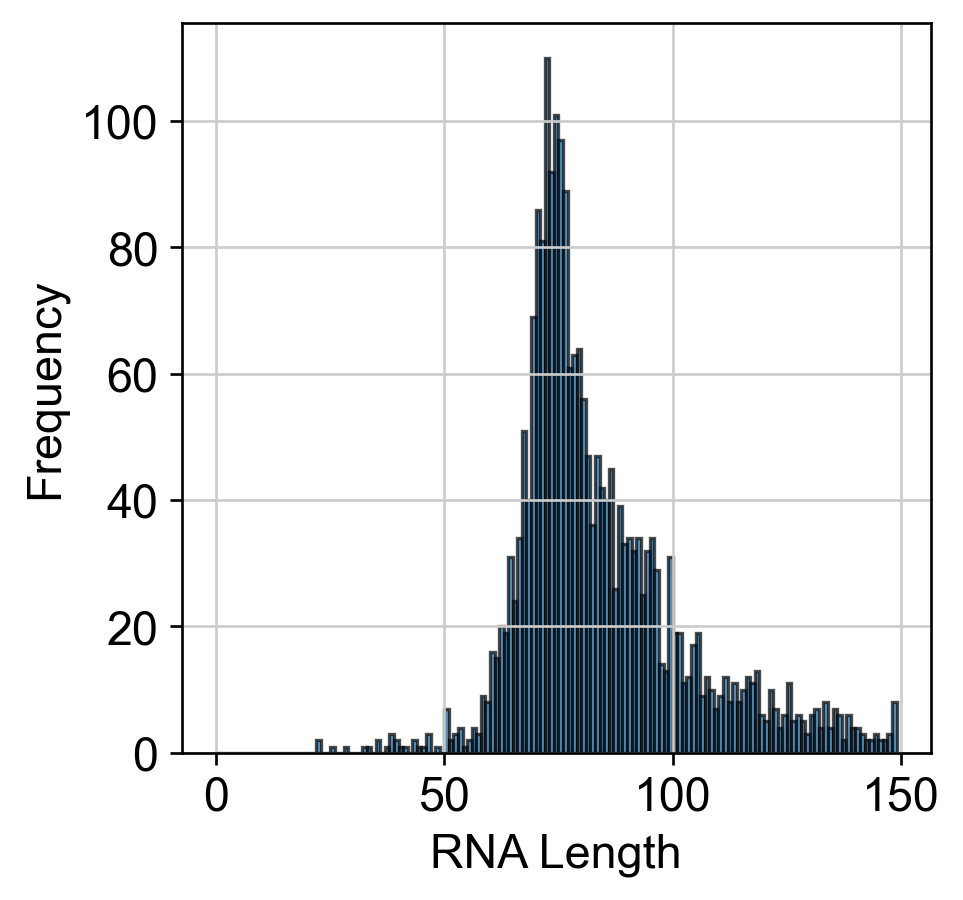

In [11]:
# Plot histogram for RNA_of_interest in the given cluster

lengths = [len(dg.loc[i, 'sequence']) for i in sorted_grouped_data[RNA_of_interest]]

# Plot histogram
plt.hist(lengths, bins=range(0, 150), edgecolor='black', alpha=0.7)
plt.xlabel("RNA Length")
plt.ylabel("Frequency")
#plt.title("Cluster 15 (SymR)")
plt.show()

In [14]:
# Calculate CAA percentage for RNA_of_interest in the given cluster
L = len(sorted_grouped_data[RNA_of_interest])
k = 0
for i in sorted_grouped_data[RNA_of_interest]:
    if dg.sequence.iloc[i][-3:]=="CCA": #[-3:]
        k = k + 1
print("percentage of CCA:", k/L)

percentage of CCA: 0.49584372402327515


In [13]:

# Get additional description of RNA_of_interest from RNAcentral database
# list of (index in dg, description)

urls = [dg.loc[i, 'xrefs'] for i in sorted_grouped_data[RNA_of_interest]]
#urls = dg[10:].xrefs.tolist()[0:25000]

descriptions = []
for i,url in tqdm(enumerate(urls)):
    descr = get_description(url)
    # descriptions.append((i,descr))
    ind_i = sorted_grouped_data[RNA_of_interest][i]
    descriptions.append((ind_i,descr))

2406it [06:39,  6.02it/s]


In [ ]:
descriptions[:3]

In [ ]:
######## ONLY for tRNA #########

In [ ]:
# only for tRNA
# get indexes of amino acids "OTHER", not associated with standard 21 amino acids
#lengths = [len(dg.loc[i, 'sequence']) for i in sorted_grouped_data["tRNA"]]
#indexes_ = [el[0] for el in descriptions if "OTHER" in el[1]]
#dg.iloc[indexes_[0]]

In [15]:
# Characterise amino acids from "OTHER" group

L = 0
k = 0
CCA = 0
for tpl in descriptions:
    ind = tpl[0]
    description = tpl[1]
    if "other" in description or "OTHER" in description:
        L = L + len(dg.sequence.iloc[ind])
        k = k + 1
        if dg.sequence.iloc[ind][-3:]=="CCA": #[-3:]
            CCA = CCA + 1

if k>0:
    print("aver length", L/k)
    print("CCA percentage", CCA/k)
else:
    print("No amino acids OTHER found")


aver length 90.83958333333334
CCA percentage 0.5979166666666667


In [ ]:
# save results to file
"""import pickle
list1 = sorted_grouped_data["tRNA"]
list2 = descriptions
with open('100k_200_53.pkl', 'wb') as f:
    pickle.dump((list1, list2), f)  # Store both lists as a tuple"""

In [16]:
# Create the histrogram of amino acids in the given cluster

descriptions_only = [el[1] for el in descriptions]

amino_acids = [("Arg","arginine"), ("His","histidine"), ("Lys","lysine"), 
               ("Asp","aspartic acid"), ("Glu","glutamic acid"),("Ser","serine"), 
               ("Thr","threonine"), ("Asn","asparagine"), ("Gln","glutamine"), ("Cys","cysteine"), 
               ("Sec","selenocysteine"), ("Gly","glycine"), ("Pro","proline"),("Ala","alanine"), 
               ("Val","valine"), ("Ile","isoleucine"), ("Leu","leucine"), ("Met","methionine"), 
               ("Phe","phenylalanine"), ("Tyr","tyrosine"), ("Trp","tryptophan"), ("OTHER", "other")]
amino_acid_dict = {key: 0 for key, _ in amino_acids}

for description in descriptions_only:
    for amino_acid in amino_acids:
        cond1 = (amino_acid[0] in description)
        cond2 = (amino_acid[1].lower() in description.lower())
        if cond1 or cond2:
            amino_acid_dict[amino_acid[0]] += 1
sorted_dict_desc = dict(sorted(amino_acid_dict.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_desc)

{'OTHER': 480, 'Ser': 262, 'Leu': 203, 'Arg': 149, 'Met': 126, 'Cys': 84, 'Ala': 84, 'Pro': 82, 'Phe': 81, 'Lys': 79, 'Gly': 77, 'Glu': 74, 'Tyr': 72, 'Thr': 69, 'Ile': 68, 'Val': 64, 'His': 53, 'Gln': 51, 'Asp': 47, 'Trp': 44, 'Asn': 41, 'Sec': 30}
